In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

In [2]:
stroke_data = pd.read_csv("healthcare-dataset-stroke-data.csv")
#hypertension = high blood pressure
stroke_data.dropna(axis = 0, how = 'any', inplace = True)
stroke_data.drop(stroke_data.index[stroke_data['gender'] == 'Other'], inplace = True)
stroke_data.drop('id', axis = 1, inplace = True)

stroke_data1 = stroke_data.loc[stroke_data['avg_glucose_level'] <= 168.32]
stroke_data = stroke_data1
stroke_data.reset_index(drop = True, inplace = True)

stroke_data2 = stroke_data.loc[stroke_data['bmi'] <= 47.5]
stroke_data = stroke_data2
stroke_data.reset_index(drop = True, inplace = True)

stroke_data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
1,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
2,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
3,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
4,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4254,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
4255,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
4256,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
4257,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
stroke_data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4259.000000,4259.000000,4259.000000,4259.000000,4259.000000,4259.000000
mean,40.596497,0.068561,0.036394,91.503646,27.814299,0.031932
std,22.445165,0.252735,0.187289,22.703827,6.722199,0.175841
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,22.000000,0.000000,0.000000,75.060000,23.000000,0.000000
50%,41.000000,0.000000,0.000000,88.050000,27.400000,0.000000
75%,58.000000,0.000000,0.000000,104.045000,32.100000,0.000000
max,82.000000,1.000000,1.000000,168.150000,47.500000,1.000000


## EDA - Exploratory Data Analysis



In [4]:
def pie():
    global stroke_data
    new_stroke_data = stroke_data.groupby('smoking_status').count()
    options = list(new_stroke_data.index)
    counts = []
    for val in options:
        counts.append(new_stroke_data["heart_disease"][val])

    new_fig = px.pie(new_stroke_data, values=counts, names=options, title="Percentage of Smokers")
    new_fig.show()
def scat():
    global stroke_data
    new_fig = px.scatter(stroke_data, x="age", y="bmi",color="avg_glucose_level")
    new_fig.show()

def smoke_hist():
    global stroke_data
    fig = px.histogram(stroke_data, x="smoking_status", y="avg_glucose_level", color='gender', barmode='group',height=400)
    fig.show()

In [5]:
pie()

In [6]:
scat()

In [7]:
smoke_hist()

In [8]:
fig = px.scatter_matrix(stroke_data,
    dimensions=["age", "avg_glucose_level", "bmi"],
    color="stroke")
fig.show()

The older you are, the more likely you are to have a stroke. The higher you average glucose level is, the higher the stroke risk becomes. The higher your BMI is, the more likely you ate to have a stroke

The most dangerous combination is a high glucose level, and old age

The only data point that does not have any direct relation to strokes is age, although it does raise the chance for a person to get a stroke, when they are older


In [9]:
hd = pd.read_csv("./healthcare-dataset-stroke-data.csv")
hd.drop('id',inplace=True,axis=1)
hd.dropna(inplace=True)
hd.reset_index(drop=True, inplace=False)
hd.drop([466, 544, 928, 1559, 2128, 2764, 2840, 3825, 4188, 4209, 4838, 270, 358])
hd["heart_disease"]=hd["heart_disease"].replace([1],15)
hd["heart_disease"]=hd["heart_disease"].replace([0],6)
bmiAgeSexStrokePlot = px.scatter_3d(hd,y=hd["avg_glucose_level"],x=hd["age"], z=hd["bmi"], symbol="ever_married",labels=dict(stroke="Number of Strokes",age="Age",gender="Sex", bmi="BMI", heart_disease="If Heart Disease Present", avg_glucose_level="Average Glucose Level",smoking_status="If Smoke"),color="stroke",opacity=0.8,size="heart_disease",size_max=20)
bmiAgeSexStrokePlot.update_yaxes(tick0=1.0, dtick=1.0)
#bmiAgeSexStrokePlot.update_traces(marker_size = 2.5)
bmiAgeSexStrokePlot.update_xaxes(tick0=1, dtick=10)
bmiAgeSexStrokePlot.update_layout(margin=dict(l=40, r=40, b=40, t=40))
#Multidimensional plot that depicts most of the variables with the stats of the given person including marriage status.
#Younger people typically have a lower glucose level
#Higher glucose level, higher chance to get a stroke
#Older, higher chance
#Higher BMI, higher chance
#Females typically have a lower glucose level

In [10]:
#X and Y (x = variables, y = stroke or not)
#Scaling?

In [11]:
def twoVarDummy(column, newColumn):
    dummyVar = pd.get_dummies(stroke_data[column])
    dummyVar.head()
    stroke_data[column] = dummyVar[dummyVar.columns[0]]

In [12]:
twoVarDummy('gender', 'sex')
twoVarDummy('ever_married', 'maritialStatus')
twoVarDummy('Residence_type', 'Residence')

/tmp/ipykernel_5760/879011250.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [13]:
def multDummy(column):
    dummiesMultVar = pd.get_dummies(stroke_data[column])
    for i in range(0, len(dummiesMultVar)):
        for j in range(0, len(dummiesMultVar.columns)-1):
            colName = dummiesMultVar.columns[j]
            colName0 = dummiesMultVar.columns[0]
            if dummiesMultVar[colName][i] == 1:
                dummiesMultVar[colName0][i] = j
    print(dummiesMultVar.head())
    stroke_data[column] = dummiesMultVar[colName0]

In [14]:
multDummy('smoking_status')

   Unknown  formerly smoked  never smoked  smokes
0        2                0             1       0
1        2                0             1       0
2        2                0             1       0
3        0                0             0       0
4        2                0             1       0


/tmp/ipykernel_5760/2613986386.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [15]:
multDummy('work_type')

   Govt_job  Never_worked  Private  Self-employed  children
0         2             0        1              0         0
1         2             0        1              0         0
2         2             0        1              0         0
3         2             0        1              0         0
4         2             0        1              0         0


/tmp/ipykernel_5760/2613986386.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [16]:
stroke_data.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4254,1,13.0,0,0,1,0,1,103.08,18.6,0,0
4255,1,81.0,0,0,0,3,0,125.20,40.0,2,0
4256,1,35.0,0,0,0,3,1,82.99,30.6,2,0
4257,0,51.0,0,0,0,2,1,166.29,25.6,1,0
4258,1,44.0,0,0,0,0,0,85.28,26.2,0,0


In [17]:
#Machine learning set-up (NEED THIS for every model)

In [18]:
import sklearn
from sklearn.model_selection import train_test_split
target = stroke_data['stroke']
input_columns = stroke_data.loc[:, stroke_data.columns != 'stroke']
x_train, x_test, y_train, y_test = train_test_split(input_columns, target, test_size = 0.8)

In [19]:
#KNN original (no modifications) -> only need the import for future KNNs

In [20]:
from sklearn.neighbors import KNeighborsClassifier as KNN
k = 5
my_KNN_model = KNN(n_neighbors = k)
my_KNN_model.fit(x_train, y_train)
y_pred = my_KNN_model.predict(x_test)

In [21]:
total_squared_error = (np.sum((y_test - y_pred)**2))
mean_squared_error = total_squared_error/len(y_pred)
print(mean_squared_error)
kNN_MSE = mean_squared_error

0.03433098591549296


<AxesSubplot:>

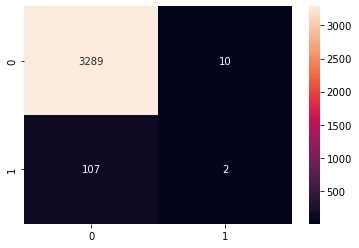

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')

Minimum error:- 0.03198356807511737 at K = 5


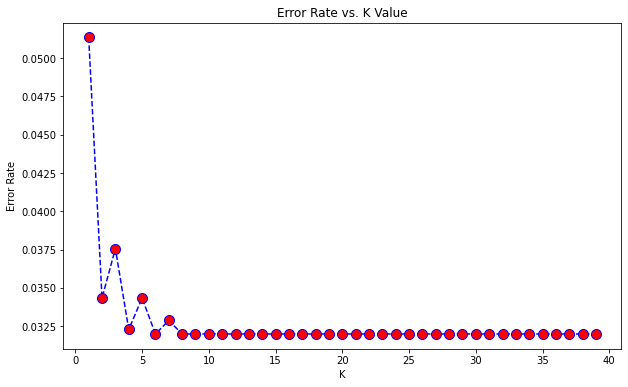

In [23]:
#min k calculations
import matplotlib.pyplot as plt
error_rate = []
for i in range(1,40):
 knn = KNN(n_neighbors=i)
 knn.fit(x_train,y_train)
 pred_i = knn.predict(x_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

In [24]:
from imblearn.over_sampling import SMOTE
from collections import Counter
counter = Counter(y_train)
print('Before', counter)
smt = SMOTE()
x_train_sm, y_train_sm = smt.fit_resample(x_train, y_train)

counter = Counter(y_train_sm)
print('After', counter)

Before Counter({0: 824, 1: 27})
After Counter({0: 824, 1: 824})


0.16314553990610328


<AxesSubplot:>

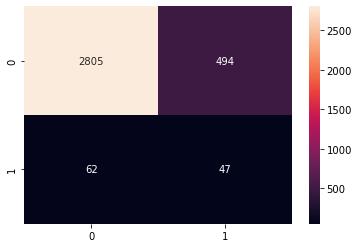

In [25]:
#KNN after using SMOTE
my_KNN_model.fit(x_train_sm, y_train_sm)
y_pred = my_KNN_model.predict(x_test)
total_squared_error = (np.sum((y_test - y_pred)**2))
mean_squared_error = total_squared_error/len(y_pred)
print(mean_squared_error)
kNN_MSE = mean_squared_error
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')

In [26]:
#Hyperparameter tuning (KNN)

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
grid_params = { 'n_neighbors' : [1, 5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'algorithm' : ['brute', 'kd_tree', 'ball_tree'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [29]:
gs = GridSearchCV(KNN(), grid_params, verbose = 1, cv=3, n_jobs = -1)

In [30]:
g_res = gs.fit(x_train_sm, y_train_sm)

Fitting 3 folds for each of 126 candidates, totalling 378 fits


In [31]:
g_res.best_score_

0.9375150411215986

In [32]:
g_res.best_params_

{'algorithm': 'brute',
 'metric': 'manhattan',
 'n_neighbors': 1,
 'weights': 'uniform'}

In [33]:
#Testing tuning (Most accurate KNN model as of right now)

0.11326291079812206


<AxesSubplot:>

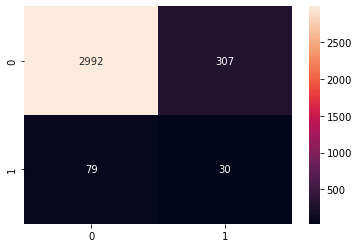

In [34]:
knn2 = KNN(n_neighbors = 1, weights = 'uniform', algorithm = 'brute', metric = 'manhattan')
knn2.fit(x_train_sm, y_train_sm)
y_pred2 = knn2.predict(x_test)
total_squared_error = (np.sum((y_test - y_pred2)**2))
mean_squared_error = total_squared_error/len(y_pred2)
print(mean_squared_error)
kNN_MSE = mean_squared_error
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred2), annot=True, fmt='g')

In [62]:
#Boosting
#!pip3 install xgboost
import xgboost as xgb
from xgboost import XGBClassifier
xg_reg = xgb.XGBRegressor(objective ='reg:logistic', colsample_bytree = 0.3, learning_rate = 0.1,max_depth = 5, alpha = 10, n_estimators = 10)

In [63]:
xg_reg.fit(x_train_sm,y_train_sm)

y_preds = xg_reg.predict(x_test)

In [68]:
total_squared_error = (np.sum((y_test - y_preds)**2))
mean_squared_error = total_squared_error/len(y_preds)
print(mean_squared_error)
bag_model_MSE = mean_squared_error
from sklearn.metrics import confusion_matrix
#import seaborn as sns
#sns.heatmap(confusion_matrix(y_test, y_preds), annot=True, fmt='g')

0.15472076832930295


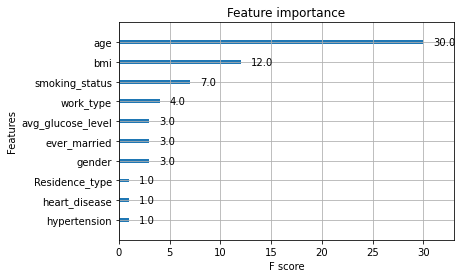

In [65]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [38]:
#Bagging model (with modified data but without GridSearch)

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
bag_model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, max_samples=0.8, bootstrap=True, oob_score=True, random_state=0)

In [40]:
bag_model.fit(x_train_sm, y_train_sm)
bag_model.oob_score_
y_pred3 = bag_model.predict(x_test)

0.06778169014084508


<AxesSubplot:>

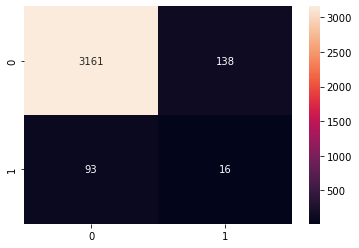

In [41]:
total_squared_error = (np.sum((y_test - y_pred3)**2))
mean_squared_error = total_squared_error/len(y_pred3)
print(mean_squared_error)
bag_model_MSE = mean_squared_error
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred3), annot=True, fmt='g')

In [42]:
#Hyperparameter tuning (Bagging)

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std

In [44]:
# evaluate a given model using cross-validation
#def evaluate_model(model, X, y):
	# define the evaluation procedure
#	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
#	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
#	return scores

#def get_models():
 #    models = dict()
    # define number of trees to consider
  #   n_trees = [10, 50, 100, 500, 500, 1000, 5000]
   #  for n in n_trees:
    #    models[str(n)] = BaggingClassifier(n_estimators=n)
     #return models
# get the models to evaluate
#models = get_models()
# evaluate the models and store results
#results, names = list(), list()
#for name, model in models.items():
	# evaluate the model
#	scores = evaluate_model(model, x_train_sm, y_train_sm)
	# store the results
#	results.append(scores)
#	names.append(name)
	# summarize the performance along the way
#	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
#pyplot.boxplot(results, labels=names, showmeans=True)
#pyplot.show()

In [45]:
#gs = GridSearchCV(bag_model(), grid_params, verbose = 1, cv=3, n_jobs = -1)

In [46]:
# evaluate bagging algorithm for classification
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier
# define the model
model = BaggingClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, x_train_sm, y_train_sm, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.957 (0.016)


In [47]:
param_grid = {'base_estimator__max_depth' : [1, 2, 3, 4, 5],'max_samples' : [0.05, 0.1, 0.2, 0.5]}

clf = GridSearchCV(BaggingClassifier(DecisionTreeClassifier(),n_estimators = 100, max_features = 0.5),param_grid,)
clf.fit(x_train_sm, y_train_sm)

GridSearchCV(estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                         max_features=0.5, n_estimators=100),
             param_grid={'base_estimator__max_depth': [1, 2, 3, 4, 5],
                         'max_samples': [0.05, 0.1, 0.2, 0.5]})

0.1431924882629108


<AxesSubplot:>

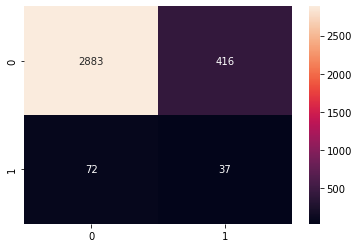

In [48]:
y_pred4 = clf.predict(x_test)
total_squared_error = (np.sum((y_test - y_pred4)**2))
mean_squared_error = total_squared_error/len(y_pred4)
print(mean_squared_error)
bag_model_MSE = mean_squared_error
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred4), annot=True, fmt='g')